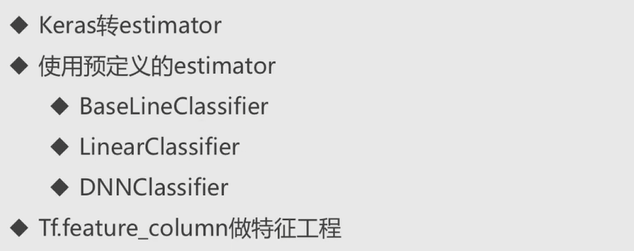

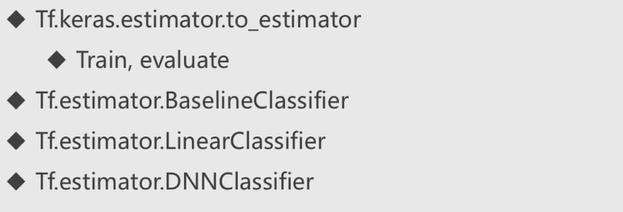

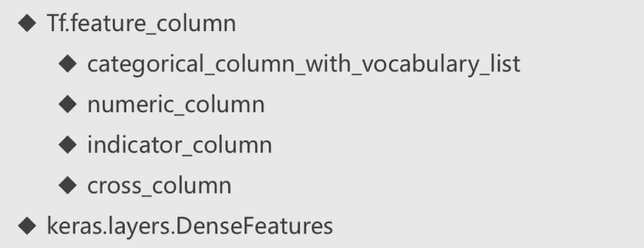

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os, sys, time

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

print(tf.__version__)
print(sys.version_info)

2.0.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [2]:
train_file = ".\\titanic\\train.csv"
eval_file = ".\\titanic\\eval.csv"

train_pd = pd.read_csv(train_file)
eval_pd = pd.read_csv(eval_file)
print(train_pd.head(3))
print(eval_pd.head(3))

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  35.0                   0      0   8.0500  Third  unknown   
1         0    male  54.0                   0      0  51.8625  First        E   
2         1  female  58.0                   0      0  26.5500  First        C   

   embark_town alone  
0  Southampton     y  
1  Southampton     y  
2  Southampton     y  


In [3]:
y_train = train_pd.pop('survived')
y_eval = eval_pd.pop('survived')

train_pd.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [5]:
print(train_pd.shape, eval_pd.shape)

(627, 9) (264, 9)


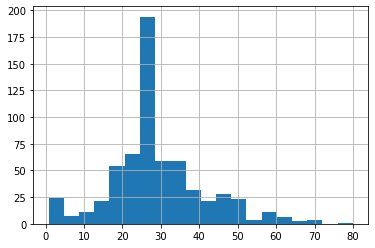

In [6]:
train_pd.age.hist(bins=20)

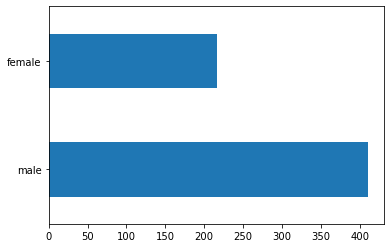

In [8]:
train_pd.sex.value_counts().plot(kind='barh')

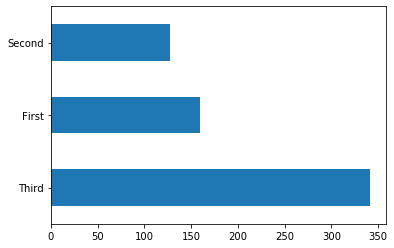

In [9]:
train_pd['class'].value_counts().plot(kind='barh')

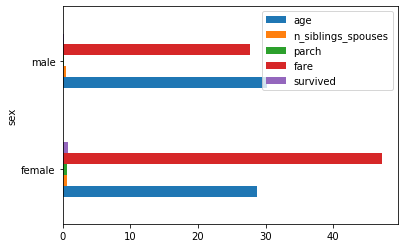

In [11]:
pd.concat([train_pd, y_train], axis=1).groupby('sex').mean().plot(kind='barh')

### feature column

In [4]:
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
numeric_columns = ['age', 'fare']

feature_columns = []
for categorical_column in categorical_columns:
    vocab = train_pd[categorical_column].unique()
    print(vocab)
    tf_onehot = tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            categorical_column, vocab)
    )
    feature_columns.append(tf_onehot)

for n_column in numeric_columns:
    feature_columns.append(
        tf.feature_column.numeric_column(
            n_column, dtype=tf.float32)
    )

['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4]
['Third' 'First' 'Second']
['unknown' 'C' 'G' 'A' 'B' 'D' 'F' 'E']
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
['n' 'y']


In [5]:
def make_dataset(data, label, epochs=10, shuffle=True, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices(
        (dict(data), label)
    )
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size)
    return dataset

In [14]:
trainset = make_dataset(train_pd, y_train)
for x, y in trainset.take(1):
    print(x, y)

{'sex': <tf.Tensor: id=49, shape=(32,), dtype=string, numpy=
array([b'male', b'male', b'male', b'male', b'male', b'male', b'female',
       b'male', b'female', b'male', b'male', b'male', b'male', b'male',
       b'male', b'male', b'female', b'female', b'male', b'male', b'male',
       b'male', b'male', b'male', b'male', b'male', b'male', b'male',
       b'male', b'male', b'male', b'male'], dtype=object)>, 'age': <tf.Tensor: id=41, shape=(32,), dtype=float64, numpy=
array([28. , 28. , 18. , 30.5, 16. , 28. , 27. ,  4. , 28. , 31. , 16. ,
       33. , 29. , 19. , 28. , 29. , 50. , 28. , 24. , 11. , 22. , 20. ,
       29. , 16. , 26. , 47. , 50. , 39. , 61. , 28. , 21. , 28. ])>, 'n_siblings_spouses': <tf.Tensor: id=47, shape=(32,), dtype=int32, numpy=
array([0, 0, 1, 0, 0, 1, 0, 4, 0, 1, 4, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0])>, 'parch': <tf.Tensor: id=48, shape=(32,), dtype=int32, numpy=
array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2,

In [15]:
# DenseFeatures: 应用feature_columns变化到 x 中
for x, y in trainset.take(1):
    print(keras.layers.DenseFeatures(feature_columns)(x).numpy())


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
[[28.  0.  1. ...  0.  1.  0.]
 [11.  1.  0. ...  0.  1.  0.]
 [ 3.  1.  0. ...  0.  1.  0.]
 ...
 [25.  0.  1. ...  0.  1.  0.]
 [26.  0.  1. ...  0.  1.  0.]
 [40.  1.  0. ...  0.  0.  1.]]


### model

In [6]:
output_dir = 'baseline_model'
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

baseline_estimator = tf.estimator.BaselineClassifier(
    model_dir=output_dir,
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'baseline_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E0066EDCF8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
baseline_estimator.train(input_fn=lambda: make_dataset(
    train_pd, y_train, epochs=10))

In [ ]:
baseline_estimator.evaluate(input_fn=lambda: make_dataset(
    eval_pd, y_eval, epochs=1, shuffle=False))

#### Liner

In [ ]:
linear_dir = 'linear_model'
if not os.path.exists(linear_dir):
    os.makedirs(linear_dir)

linear_estimator = tf.estimator.LinearClassifier(
    model_dir=linear_dir,
    n_classes=2,
    feature_columns=feature_columns
)
linear_estimator.train(input_fn=lambda : make_dataset(
    train_pd, y_train, epochs=10
))

In [ ]:
# 交叉特征
feature_columns.append(tf.feature_column.indicator_column(
    tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)))

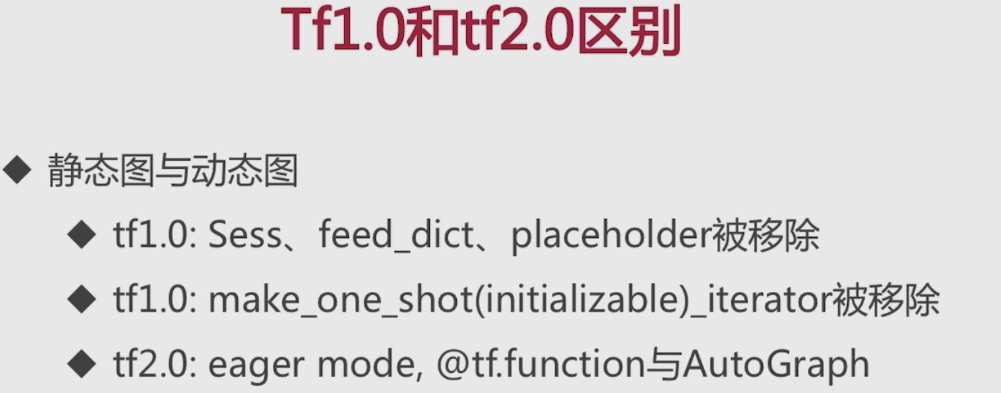

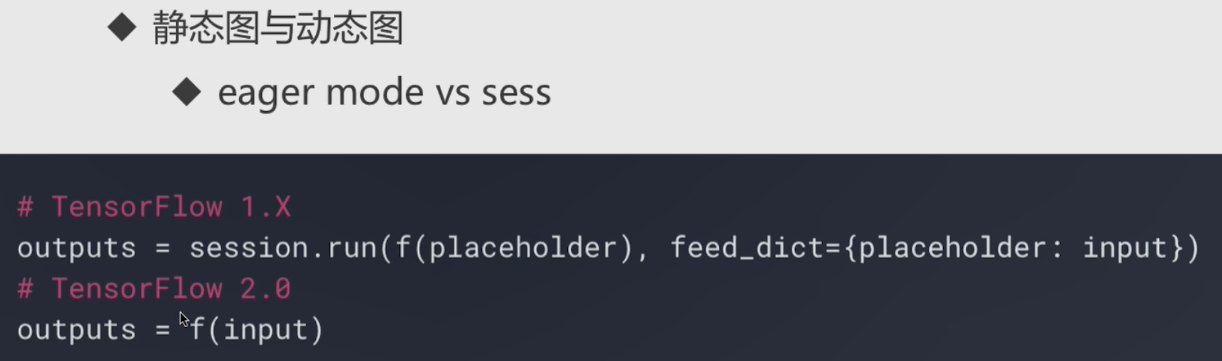

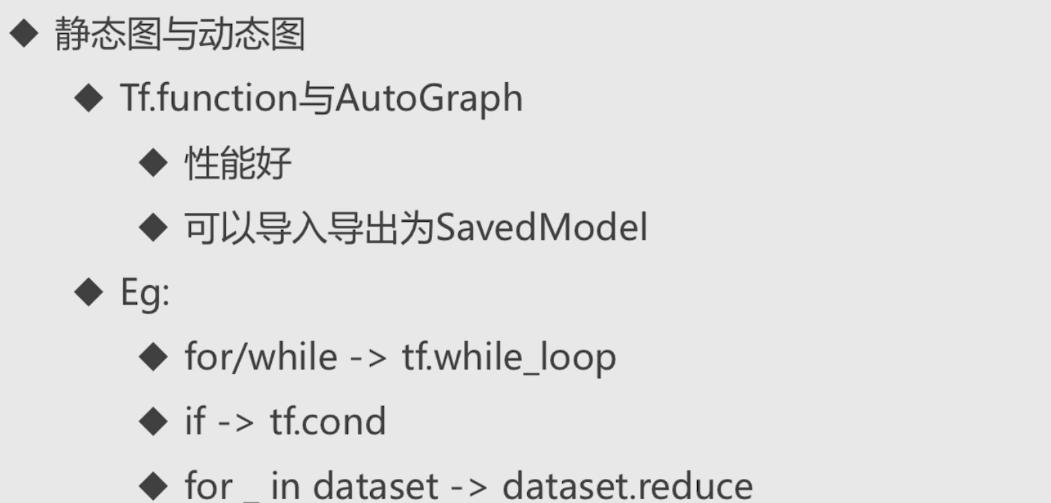

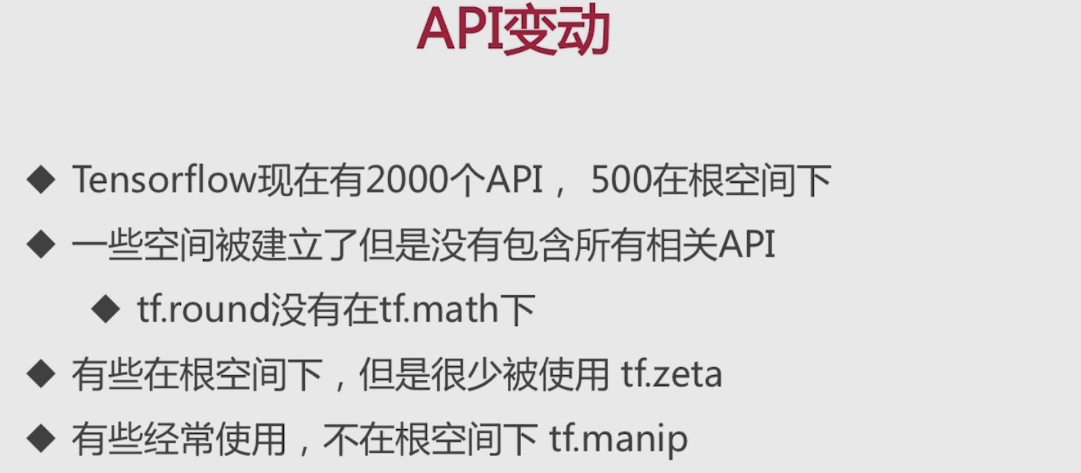

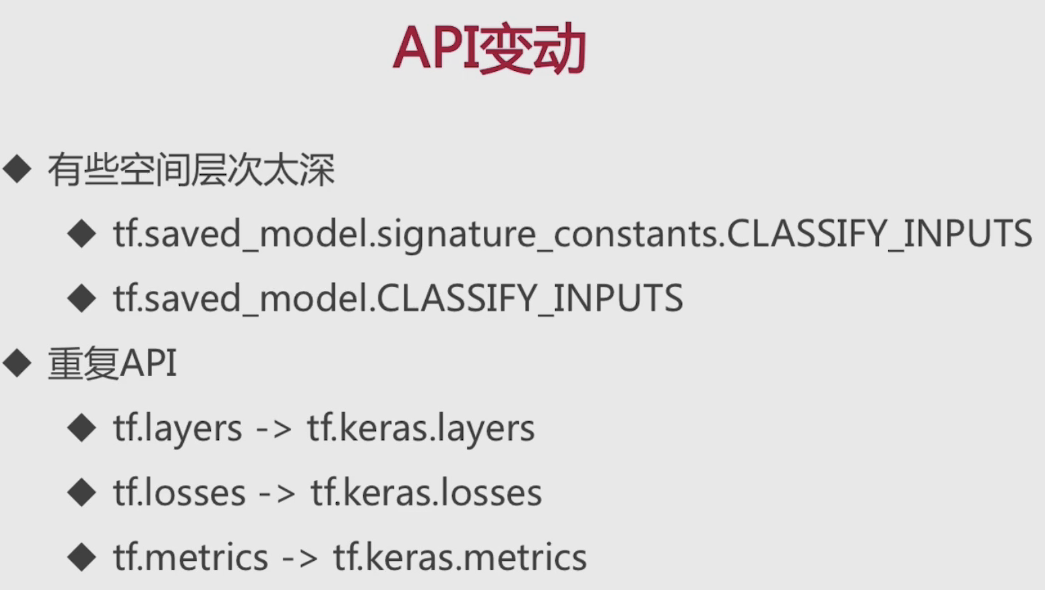

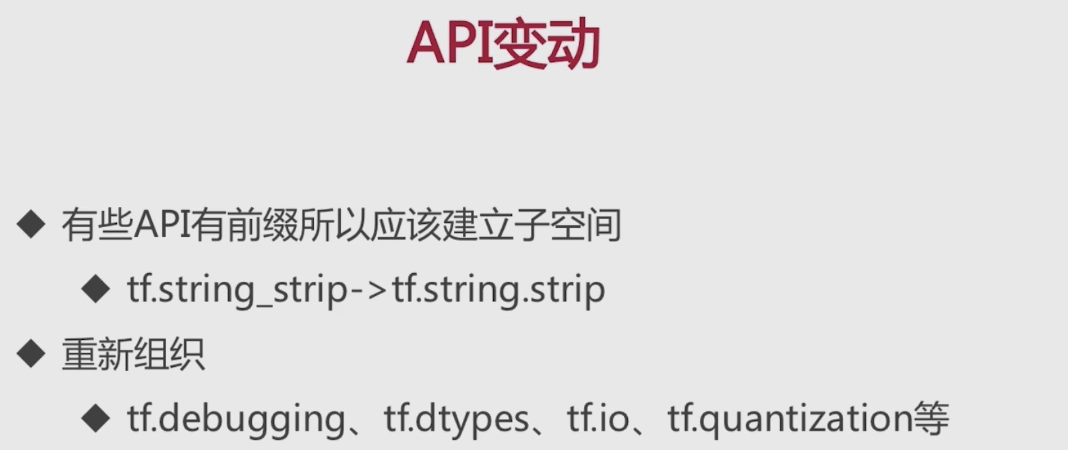

### 升级2.0

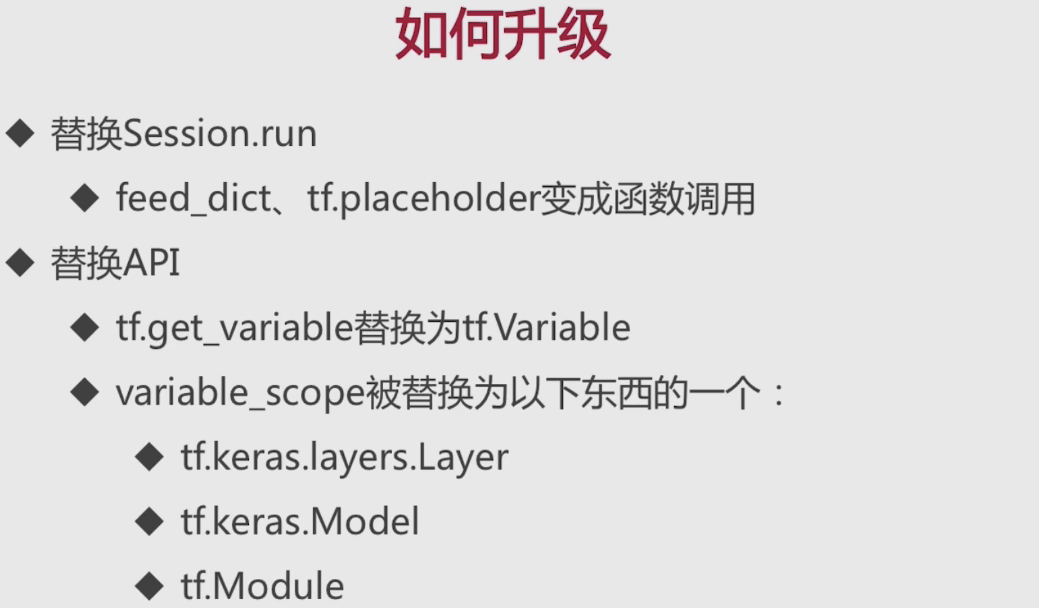

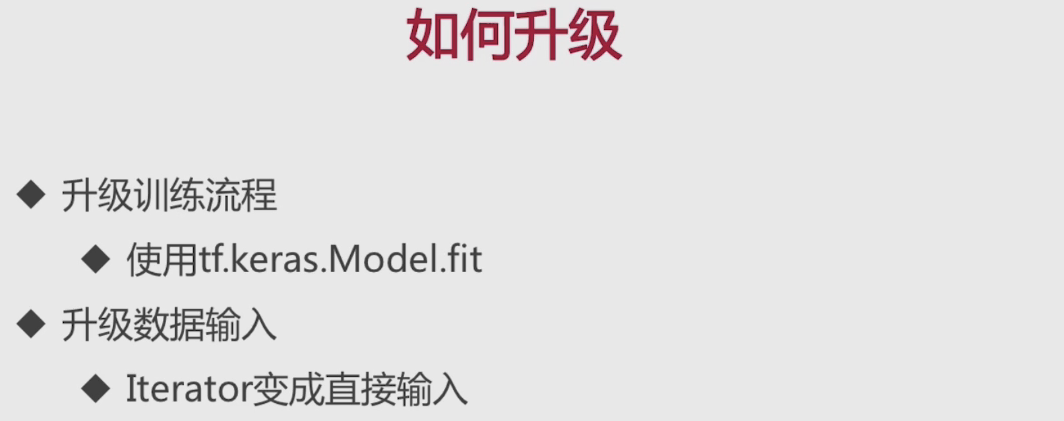